## Observations and Insights 

Ten drugs were tested:

Capomulin,
Ceftamin,
Infubinol,
Ketapril,
Naftisol,
Placebo,
Propriva,
Ramicane,
Stelasyn,
Zoniferol.

Out of ten, two seems to be more promising as outlined in summary data stats, Capulin and Ramicane.
Mice population is almost equally split between male/female.

'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin' were selected for further analysis and Capulin and Ramicane still outperfomed as per Mean final volume size.

It has beign noted a positive strong correlation between average volume of tumor and the weight of a mouse.




In [193]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

In [5]:
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
len(pd.unique(merged_df["Mouse ID"]))

249

In [7]:
mouse_metadata["Mouse ID"].count()

249

In [8]:
study_results["Mouse ID"].count()

1893

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup=merged_df[merged_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
dup.head(len(dup))

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_df=merged_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep='last')

In [12]:
# Checking the number of mice in the clean DataFrame.
dupcheck=Clean_df[Clean_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
dupcheck.head(len(dupcheck))

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [13]:
len(pd.unique(Clean_df["Mouse ID"]))

249

## Summary Statistics

In [199]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by Drug Regimen
summary_df = Clean_df.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_var = summary_df['Tumor Volume (mm3)'].std()*summary_df['Tumor Volume (mm3)'].std()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grouped_df.head(10)



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment - Considering only ID uniques')

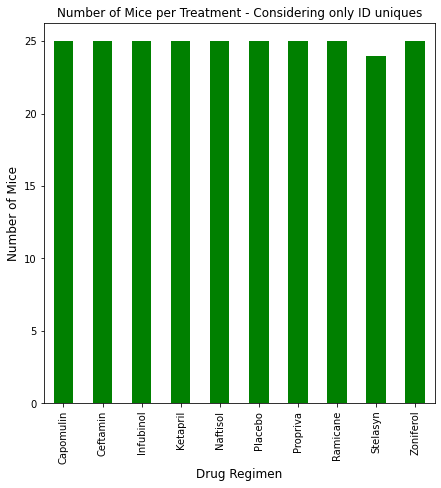

In [66]:
# Generate a bar plot showing the total number of mice with ID unique 
#(Looking the Mouse_metadata.csv seem that the number of mouse are around 200 so considering 10 treatments _
#the exspected mice popolation should be in the range of 20sh-30sh) for each treatment 
#throughout the course of the study using pandas. 

Sumbar_bf=Clean_df.drop_duplicates(subset=["Mouse ID"], keep='last')
miceID_qty = Sumbar_bf.groupby('Drug Regimen').count()["Mouse ID"]

miceID_qty.plot.bar(figsize=(7,7), color='g',fontsize = 10,rot=90)

plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice per Treatment - Considering only ID uniques",fontsize = 12)

Text(0.5, 1.0, 'Number of Mice per Treatment - Total')

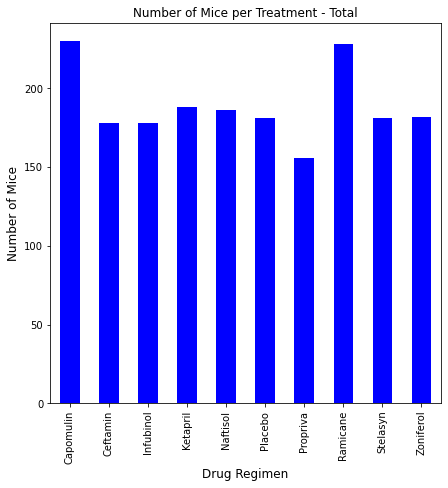

In [67]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

miceID_qty = Clean_df.groupby('Drug Regimen').count()["Mouse ID"]

miceID_qty.plot.bar(figsize=(7,7), color='b',fontsize = 10,rot=90)

plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice per Treatment - Total",fontsize = 12)

In [129]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
print(pd.unique(merged_df["Drug Regimen"]))

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

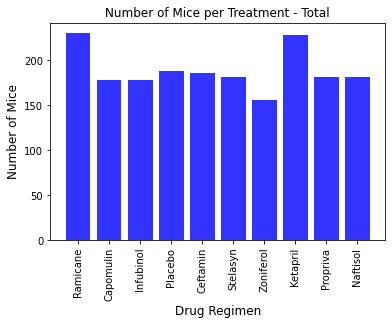

In [100]:
mylabels=pd.unique(merged_df["Drug Regimen"])
plt.bar(mylabels,miceID_qty, color='b', alpha=0.8, align='center')

plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice per Treatment - Total",fontsize = 12)
plt.xticks(rotation='vertical')

<AxesSubplot:ylabel='Mouse ID'>

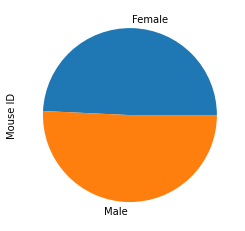

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Clean_df.groupby('Sex').count()["Mouse ID"].plot(kind='pie')

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

y=Clean_df.groupby('Sex').count()["Mouse ID"]
y

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

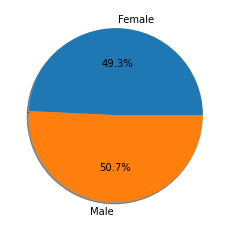

In [81]:
mylabels = ["Female", "Male"]

plt.pie(y, labels = mylabels ,autopct='%1.1f%%', shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [107]:
# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, Clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [109]:
# Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, Clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [110]:
# Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, Clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [140]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, Clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [141]:
Clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [142]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=Clean_df.groupby('Mouse ID')["Timepoint"].max()
last_timepoint.head()
last_timepoint = last_timepoint.reset_index()

In [146]:
last_timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [145]:
df_lastmerged=last_timepoint.merge(Clean_df, on=['Mouse ID',"Timepoint"],how="left")

In [148]:
df_lastmerged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [159]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Drug_list

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [160]:
# Create empty list to fill with tumor vol data (for plotting)
Tumor_Volume=[]
total_tumor_vol=[]

In [161]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Tumor_Volume = df_lastmerged.loc[df_lastmerged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    total_tumor_vol.append(Tumor_Volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = Tumor_Volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = Tumor_Volume.loc[(Tumor_Volume < lower_bound) | (Tumor_Volume> upper_bound)]
    
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


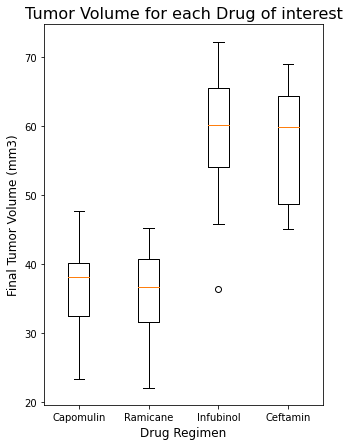

In [176]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(5,7))
ax1.set_title('Tumor Volume for each Drug of interest',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(total_tumor_vol, labels=Drug_list, widths = 0.3, patch_artist=False,vert=True)
plt.show()

## Line and Scatter Plots

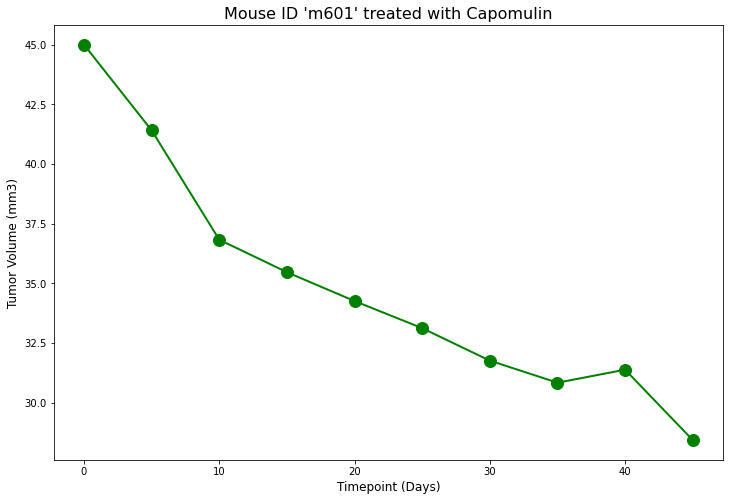

In [189]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Mouse ID = "m601"
mouse_in_capomulin = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "m601",:]
mouse_in_capomulin

# Specify plot parameters
x_axis = mouse_in_capomulin["Timepoint"]
tumor_volume = mouse_in_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Mouse ID 'm601' treated with Capomulin",fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12,marker="o",color="green", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =12)
plt.ylabel("Tumor Volume (mm3)",fontsize =12)

plt.show()


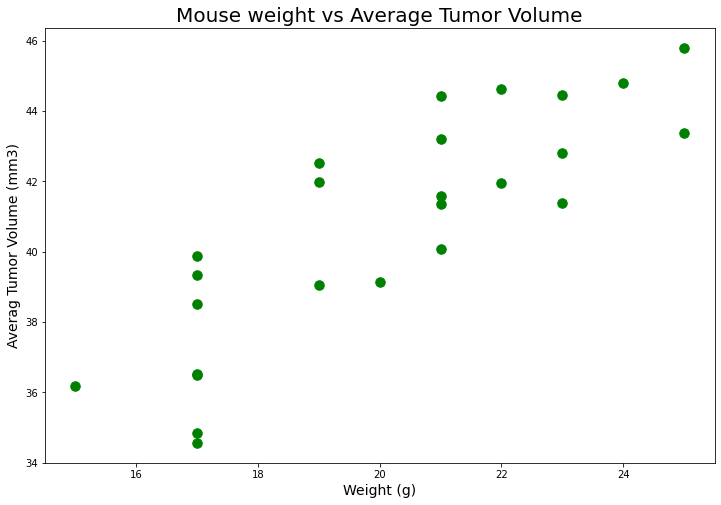

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [190]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_capom_df = Capomulin_df.groupby(['Mouse ID']).mean()

fig1, ax1 = plt.subplots(figsize=(12, 8))
marker_size=14
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'],s=90, color="green")
plt.title("Mouse weight vs Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =14)

plt.show()

avg_capom_df.head()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84
y = 0.95x + 21.55


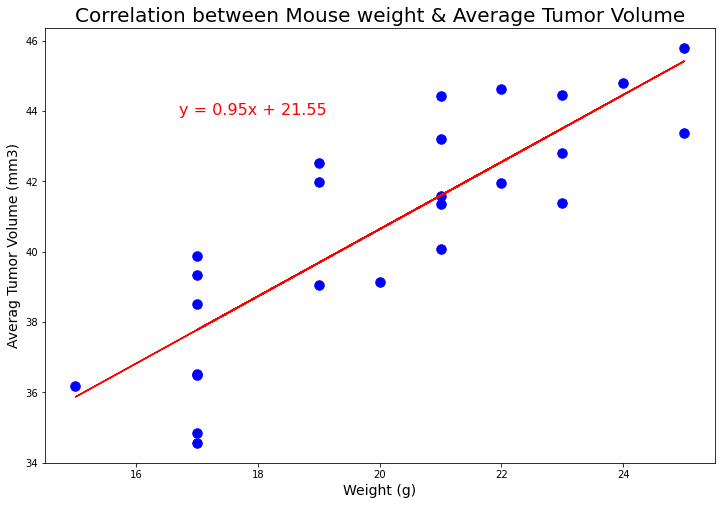

In [198]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation calculation
correlation = round(st.pearsonr(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

#Data for linear regression
x_values = avg_capom_df['Weight (g)']
y_values = avg_capom_df['Tumor Volume (mm3)']

#linear regression eauation definition
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

#Plotting data
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.plot(x_values,regress_values,"r-")

#Plotting axis 
plt.title("Correlation between Mouse weight & Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Averag Tumor Volume (mm3)", fontsize = 14)

#Annotation
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=16,color="red")
plt.show()